[ 61  61  61 ...  71 225 217]


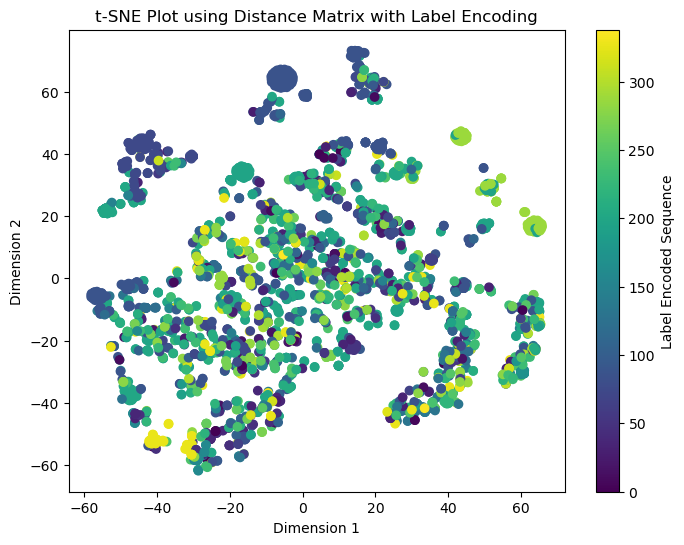

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Load distance matrix
distance_matrix = np.load('alpha_distance_people_matrix.npy')

# Load the dataset containing sequence features
data = pd.read_csv("alpha_p.csv") 

# Extract sequence features (antigen.epitope)
sequences = data['antigen.epitope']

# Label encoding of sequence features
encoder = LabelEncoder()
sequences_encoded = encoder.fit_transform(sequences)
print(sequences_encoded)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(distance_matrix)

# Visualize t-SNE dimensionality reduction results, colored with label-encoded sequence features
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=sequences_encoded, cmap='viridis')
plt.colorbar(label='Label Encoded Sequence')
plt.title('t-SNE Plot using Distance Matrix with Label Encoding')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()



In [2]:
data

,Unnamed: 0.1,Unnamed: 0,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,count
0,0,0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2,1
1,1,3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2,1
2,2,7,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2,1
3,3,9,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,HIV-1,2,1
4,4,12,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,HIV-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,2747,92681,30550,TRA,CIALNARLMF,TRAV26-1*01,TRAJ31*01,HomoSapiens,PQPELPYPQPQL,Gluten,Wheat,2,1
2748,2748,92683,30551,TRA,CAMREGRYSSASKIIF,TRAV14/DV4*01,TRAJ3*01,HomoSapiens,FPQPEQPFPWQP,Gluten,Wheat,2,1
2749,2749,92685,30552,TRA,CLVGDGDGGATNKLIF,TRAV4*01,TRAJ32*01,HomoSapiens,FPQPEQPFPWQP,Gluten,Wheat,2,1
2750,2750,92689,30554,TRA,CAASVLYGSSNTGKLIF,TRAV29/DV5*01,TRAJ37*01,HomoSapiens,QLQPFPQPELPY,Gluten,Wheat,2,1


In [3]:
data.isnull().sum()

Unnamed: 0.1       0
Unnamed: 0         0
complex.id         0
gene               0
cdr3_a_aa          0
v_a_gene           0
j_a_gene           0
species            0
antigen.epitope    0
antigen.gene       0
antigen.species    0
vdjdb.score        0
count              0
dtype: int64

In [4]:
# Imports

import time
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

%matplotlib inline

RS = 1729; # Fix the random state for t-SNE. This makes the lab results reproducible.

In [10]:
# Utility function to visualize the outputs of PCA and t-SNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=100, c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

t-SNE done! Time elapsed: 11.119035005569458 seconds


(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(7.7088847, -28.00094, '0'),
  Text(-23.200397, -48.791348, '1'),
  Text(-7.20895, -9.788812, '2'),
  Text(6.196974, 38.79621, '3'),
  Text(-1.8130581, -12.01689, '4'),
  Text(8.80594, -11.8458605, '5'),
  Text(-16.007952, -49.027676, '6'),
  Text(0.7807789, -15.382437, '7'),
  Text(-2.7084465, -20.103176, '8'),
  Text(-22.39738, 10.470545, '9'),
  Text(21.522837, 58.844166, '10'),
  Text(-25.536047, -21.929958, '11'),
  Text(-7.3837566, -45.8457, '12'),
  Text(33.55426, -36.420055, '13'),
  Text(8.21526, -1.4843566, '14'),
  Text(-30.351004, -33.89998, '15'),
  Text(-12.978819, -17.711552, '16'),
  Text(11.705284, -20.419008, '17'),
  Text(-7.589432, -6.478326, '18'),
  Text(2.7315729, 11.388363, '19'),
  Text(4.4710126, 15.938464, '20'),
  Text(4.655487, 19.895525, '21'),
  Text(-5.30639, 5.813743, '22'),
  Text(-17.67123, -21.388521, '23'),
  Text(-22.810831, 13.502367, '24'),
  Text(-20.02811, -28.896778, '25'),
  Text(6.661718, 

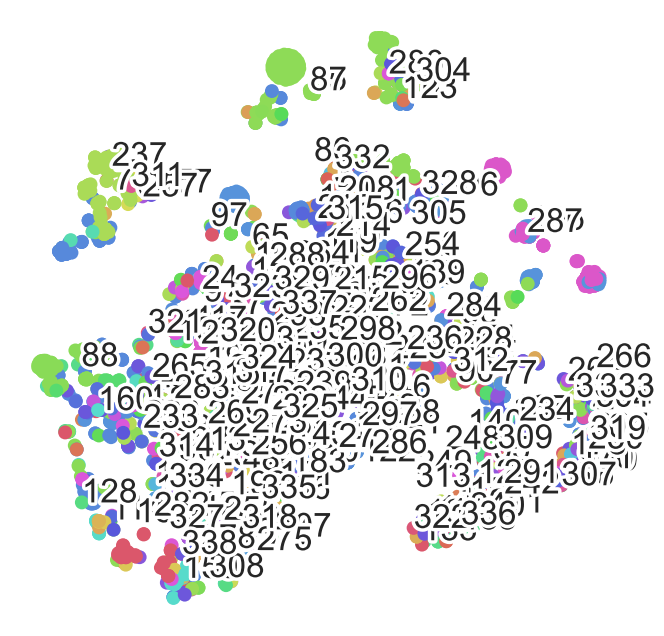

In [11]:
from sklearn.manifold import TSNE
import time

# Assuming X_subset is defined as a subset of your data
# Initialize t-SNE with random state RS
tsne = TSNE(random_state=RS)

# Start timing
time_start_tsne = time.time()

# Apply t-SNE to X_subset
X_tsne = tsne.fit_transform(distance_matrix)

# End timing
time_elapsed_tsne = time.time() - time_start_tsne

# Print the time taken for t-SNE
print('t-SNE done! Time elapsed: {} seconds'.format(time_elapsed_tsne))

fashion_scatter(X_tsne, colors=sequences_encoded)

/Users/lulu/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP done! Time elapsed: 23.116501092910767 seconds


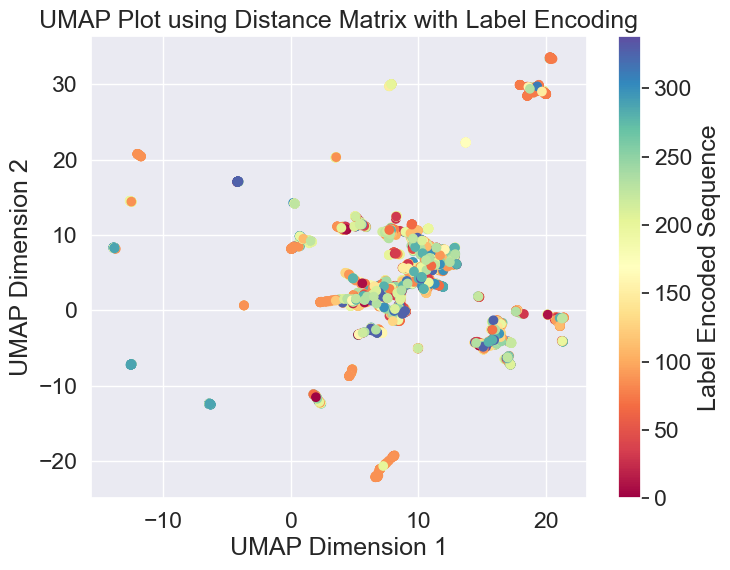

In [12]:
import umap
import numpy as np
import matplotlib.pyplot as plt
# Initialize UMAP and perform dimensionality reduction
umap_model = umap.UMAP(random_state=RS)
time_start_umap = time.time()
X_umap = umap_model.fit_transform(distance_matrix)
time_elapsed_umap = time.time() - time_start_umap

# Print the time taken for UMAP
print('UMAP done! Time elapsed: {} seconds'.format(time_elapsed_umap))

# Visualize UMAP dimensionality reduction results, colored with label-encoded sequence features
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=sequences_encoded, cmap='Spectral')
plt.colorbar(label='Label Encoded Sequence')
plt.title('UMAP Plot using Distance Matrix with Label Encoding')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

[ 61  61  61 ...  71 225 217]


/Users/lulu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lulu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lulu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lulu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

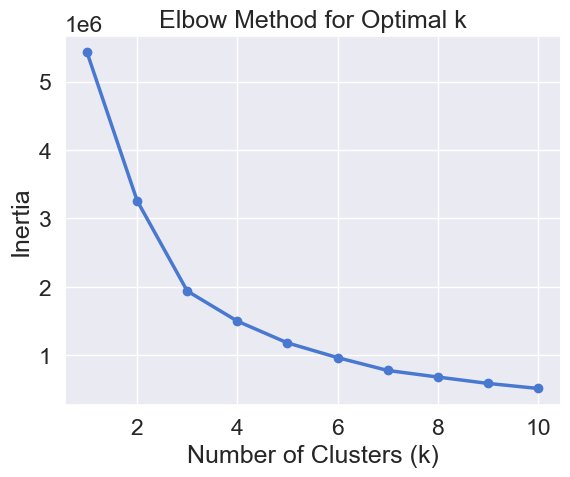

In [23]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load distance matrix
distance_matrix = np.load('alpha_distance_people_matrix.npy')

# Load the dataset containing sequence features
data = pd.read_csv("alpha_p.csv") 

# Extract sequence features (antigen.epitope)
sequences = data['antigen.epitope']

# Label encoding of sequence features
encoder = LabelEncoder()
sequences_encoded = encoder.fit_transform(sequences)
print(sequences_encoded)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(distance_matrix)


# Assuming X_tsne is your t-SNE transformed data
# Define a range of k values to try
k_values = range(1, 11)  # Try k from 1 to 10 clusters

# Initialize an empty list to store the inertia values (Sum of squared distances of samples to their closest cluster center)
inertia_values = []

# Iterate through each value of k
for k in k_values:
    # Initialize KMeans clustering for current value of k
    kmeans = KMeans(n_clusters=k, random_state=RS)
    # Fit KMeans clustering to the data
    kmeans.fit(X_tsne)
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


X = X_umap


# Calculate the silhouette coefficient for each cluster number
for n_clusters in range(2, 11):
    # Create a KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # perform clustering
    cluster_labels = kmeans.fit_predict(X)
    # Calculate silhouette coefficient
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


In [25]:
from sklearn.cluster import KMeans

# Assuming X_tsne is your t-SNE transformed data
# Assuming n_clusters is the number of clusters you want to find
k = 4 

# Initialize KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=RS,precompute_distances='auto')

# Perform KMeans clustering on the t-SNE transformed data
kmeans.fit(X_tsne)

# Get cluster labels
cluster_labels = kmeans.labels_

# Visualize the clustering result
fashion_scatter(X_tsne, colors=cluster_labels)
# add labels
'''for i, label in enumerate(sequences_original):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], label, fontsize=1.5)

plt.show()'''

TypeError: KMeans.__init__() got an unexpected keyword argument 'precompute_distances'

In [ ]:
#算召回率评估效果好坏 是否按抗原表位分类 

/Users/lulu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


每个数据所属的簇编号： [1 1 1 ... 1 2 1]
每个簇的成员： [[   0    3]
 [   1    4]
 [   5 2752]
 ...
 [5498 5499]
 [2005 5500]
 [2383 5501]]
聚类过程： [[0.00000000e+00 3.00000000e+00 0.00000000e+00 2.00000000e+00]
 [1.00000000e+00 4.00000000e+00 0.00000000e+00 2.00000000e+00]
 [5.00000000e+00 2.75200000e+03 0.00000000e+00 3.00000000e+00]
 ...
 [5.49800000e+03 5.49900000e+03 1.93451747e+02 2.75000000e+03]
 [2.00500000e+03 5.50000000e+03 1.95310545e+02 2.75100000e+03]
 [2.38300000e+03 5.50100000e+03 2.13998546e+02 2.75200000e+03]]


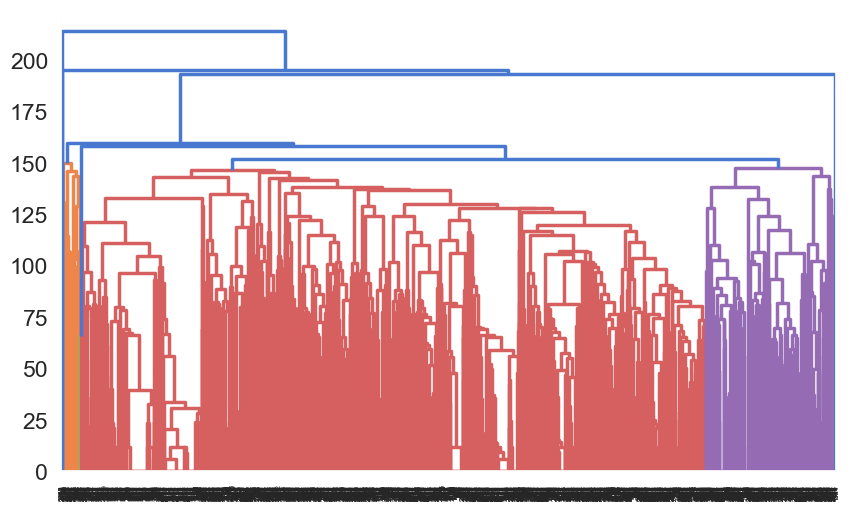

In [26]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial.distance as dist
from scipy.cluster.hierarchy import dendrogram, linkage

# 基于距离矩阵进行聚类
model = AgglomerativeClustering(n_clusters=8, affinity='precomputed', linkage='average')
clustering2 = model.fit(distance_matrix)


print("每个数据所属的簇编号：", clustering2.labels_)
print("每个簇的成员：", clustering2.children_)

# 调整距离矩阵的形状
adjust_distance_matrix = dist.squareform(distance_matrix)

# linkage方法用于计算两个聚类簇s和t之间的距离d(s,t)
# 层次聚类编码为一个linkage矩阵。
Z = linkage(adjust_distance_matrix, 'average')
print("聚类过程：", Z)

# 将层级聚类结果以树状图表示出来
fig = plt.figure(figsize=(10, 6))
dn = dendrogram(Z)
plt.show()